## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 
  
  
  

In [16]:
import pandas as pd

df = pd.read_csv("titanic.csv")


**Задача 1:** Який відсоток виживання серед чоловіків / жінок? 

In [105]:
import pandas as pd

df = pd.read_csv("titanic.csv")

survival_rates = df.groupby("Sex")["Survived"].mean() * 100

print("Survival rate among males and females:")
print(survival_rates)


Survival rate among males and females:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


**Задача 2:** Відтворіть ці графіки  
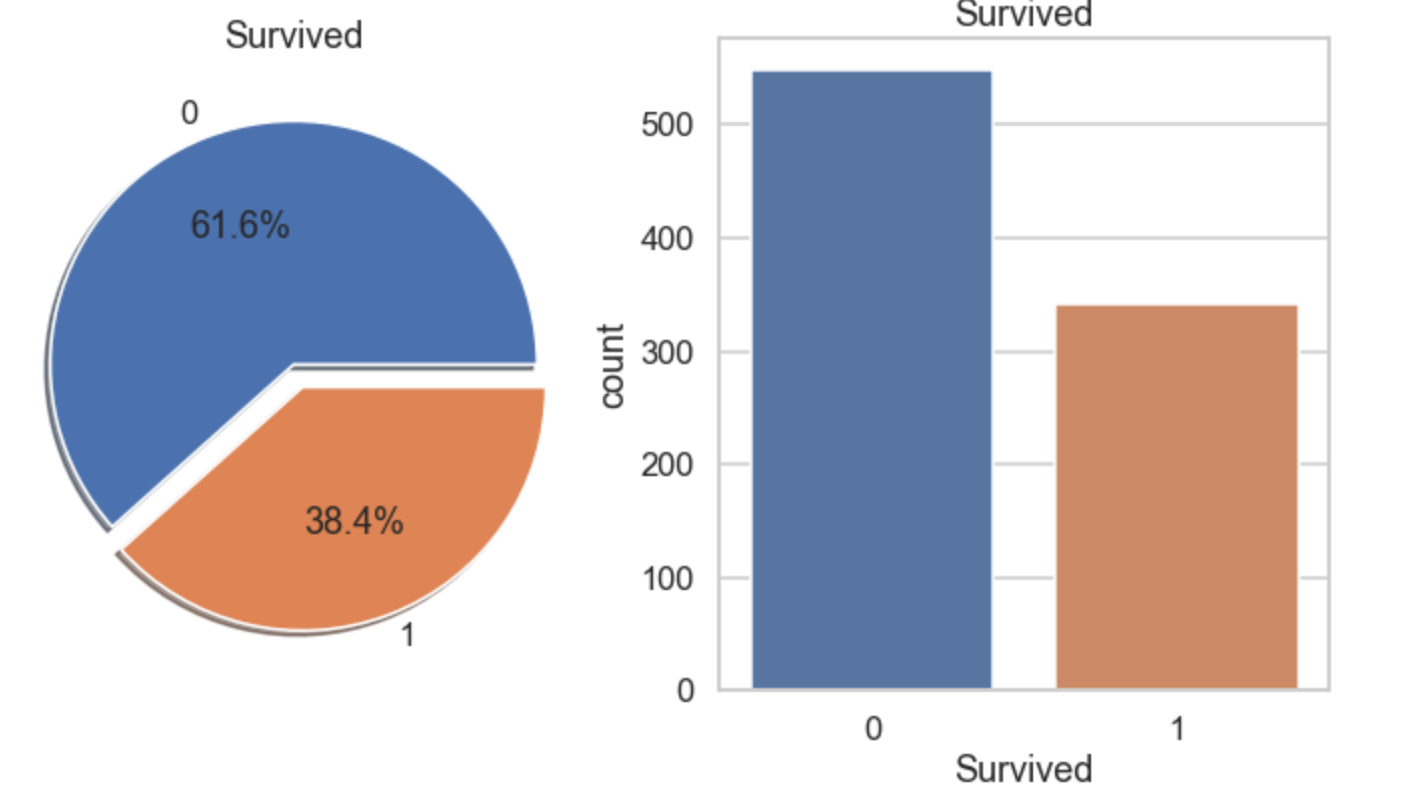


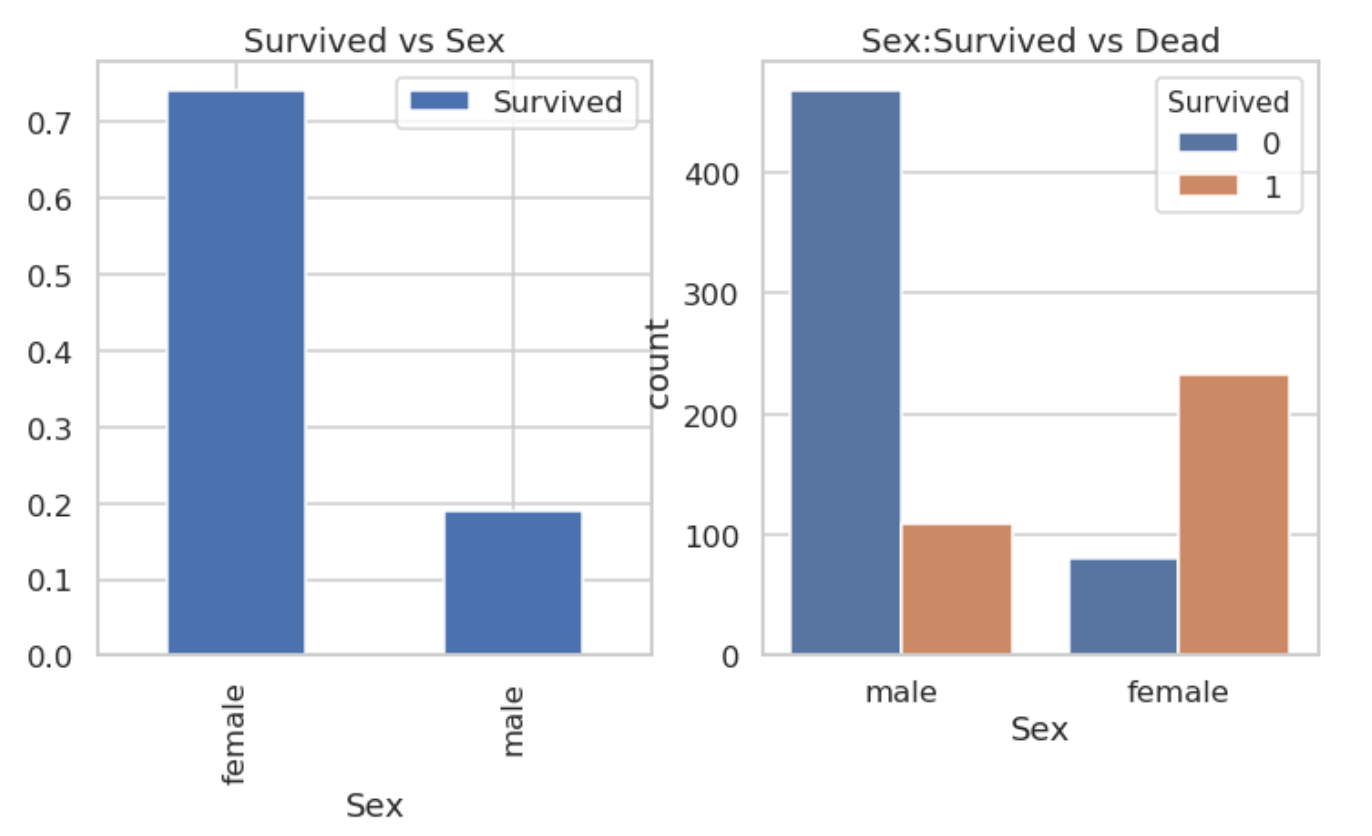

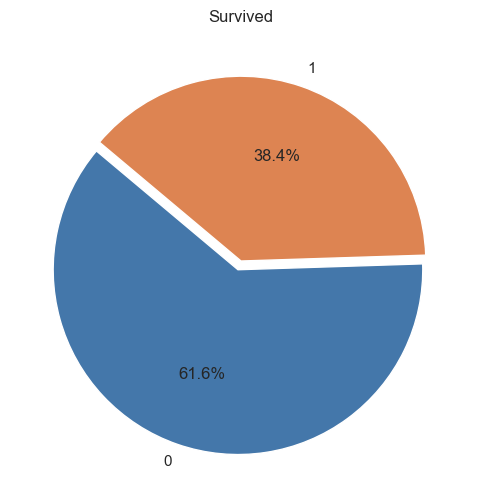

C:\Users\Artur\AppData\Local\Temp\ipykernel_13868\1680189679.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette=['#4477AA', '#DD8452'])


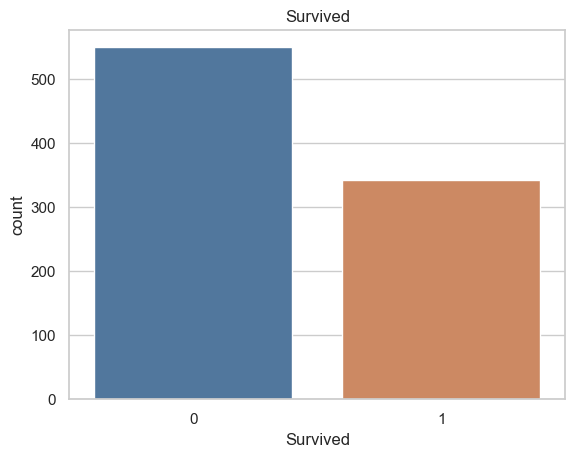

C:\Users\Artur\AppData\Local\Temp\ipykernel_13868\1680189679.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, palette=['#4477AA'])
C:\Users\Artur\AppData\Local\Temp\ipykernel_13868\1680189679.py:17: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Sex", y="Survived", data=df, palette=['#4477AA'])


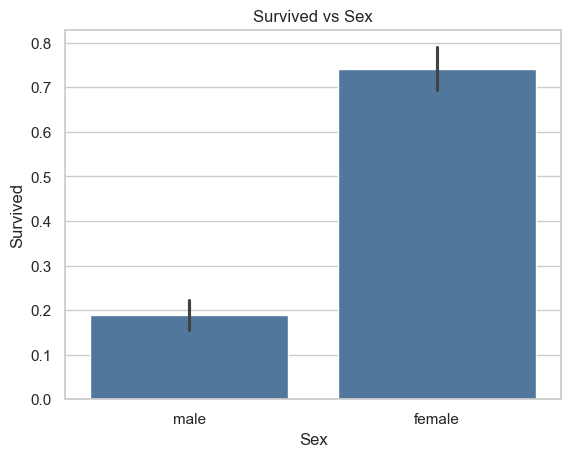

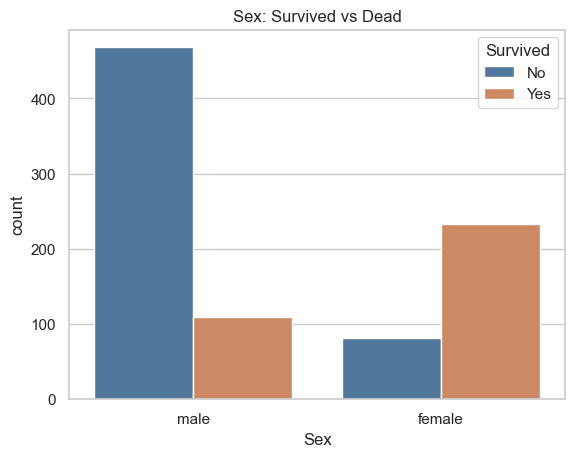

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
df["Survived"].value_counts().plot.pie(autopct='%1.1f%%', colors=['#4477AA', '#DD8452'], startangle=140, explode=(0.05, 0), title="Survived")
plt.ylabel('')
plt.show()

sns.countplot(x="Survived", data=df, palette=['#4477AA', '#DD8452'])
plt.title("Survived")
plt.show()

sns.barplot(x="Sex", y="Survived", data=df, palette=['#4477AA'])
plt.title("Survived vs Sex")
plt.show()

sns.countplot(x="Sex", hue="Survived", data=df, palette=['#4477AA', '#DD8452'])
plt.title("Sex: Survived vs Dead")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


Прокоментуйте побудовані графіки
# 1 Код створює кругову діаграму, яка показує відсоткове співвідношення виживших і загиблих пасажирів.
# 2 Будує стовпчасту діаграму, яка показує кількість загиблих (0) і виживших (1) пасажирів.
# 3 Відображає розподіл виживших і загиблих серед чоловіків та жінок, показуючи різницю у виживаності за статтю.
# 4 Будує графік, який показує середній рівень виживаності серед чоловіків та жінок.

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних? 


In [109]:
import pandas as pd
df = pd.read_csv("titanic.csv")
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі. 

In [110]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df_females = df[df["Sex"] == "female"].copy()
df_females["First Name"] = df_females["Name"].str.extract(r'\(([^)]+)\)|Miss\.\s+(\w+)').bfill(axis=1).iloc[:, 0]
print("Most common female name:", df_females["First Name"].mode()[0])


Most common female name: Anna


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі. 

In [111]:
import pandas as pd
df = pd.read_csv("titanic.csv")
ales = df[df["Sex"] == "male"].copy()
df_males["First Name"] = df_males["Name"].str.extract(r'Mr\.\s+(\w+)')
print("Most common male name:", df_males["First Name"].mode()[0])

Most common male name: William


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
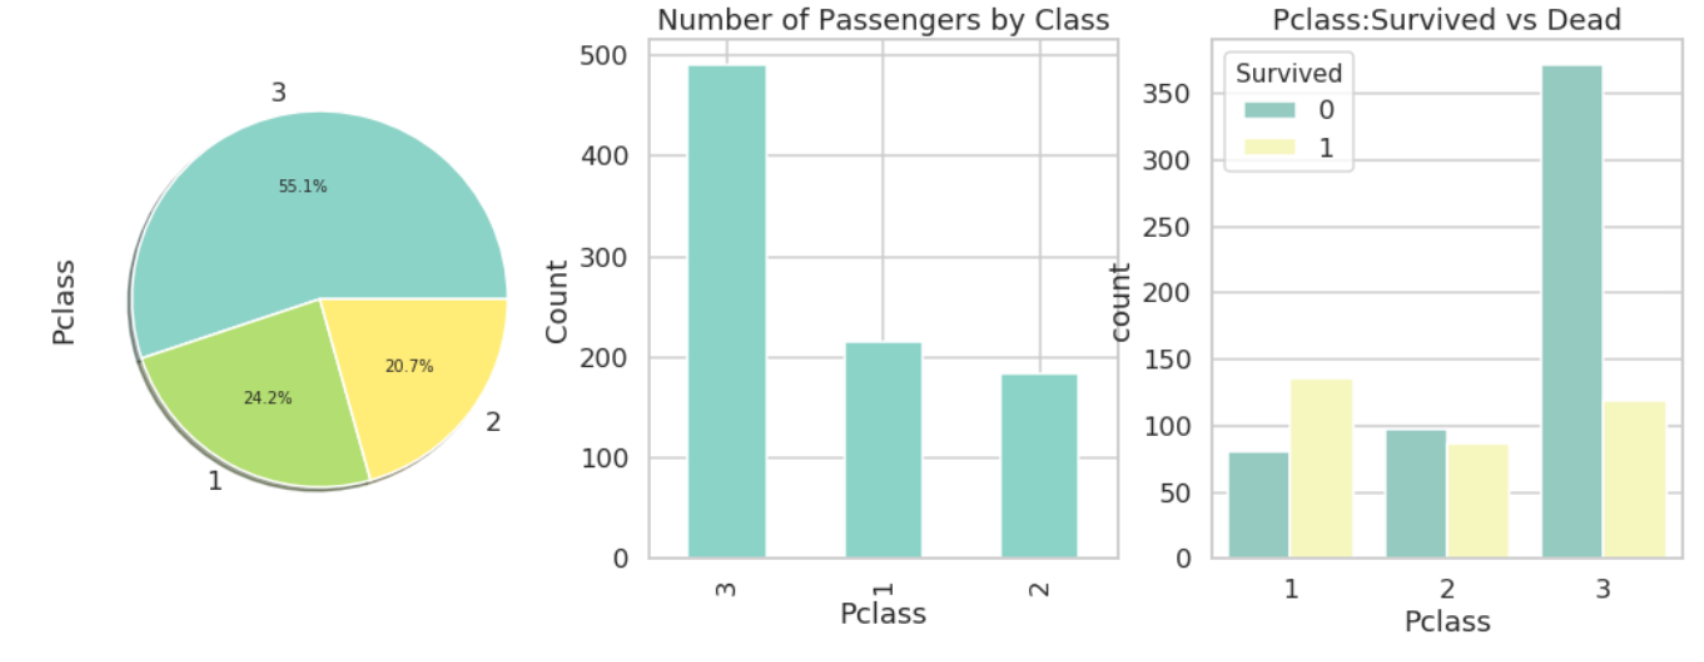

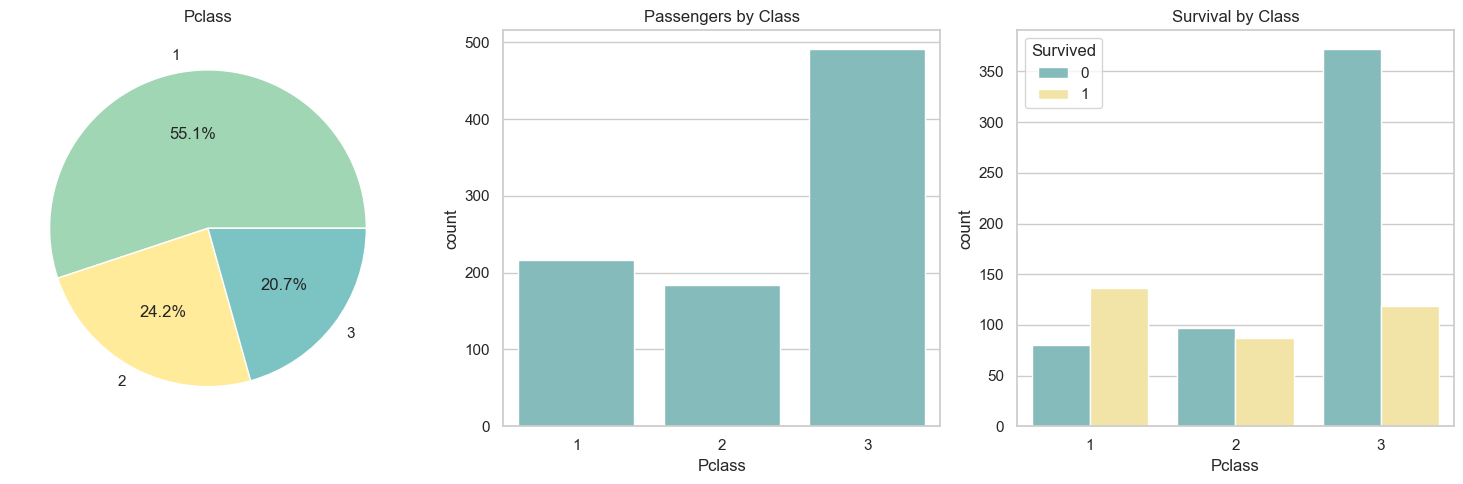

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].pie(df["Pclass"].value_counts(), labels=[1, 2, 3], autopct='%1.1f%%', colors=["#a0d6b4", "#ffeb99", "#7cc4c4"])
axes[0].set_title("Pclass")

sns.countplot(x="Pclass", data=df, ax=axes[1], color="#7cc4c4")
axes[1].set_title("Passengers by Class")

sns.countplot(x="Pclass", hue="Survived", data=df, ax=axes[2], palette=["#7cc4c4", "#ffeb99"])
axes[2].set_title("Survival by Class")

plt.tight_layout()
plt.show()


# 1 Найбільше пасажирів було в 3-му класі (55.1%), що логічно, адже він був найдешевшим і доступним для більшості людей.
# У 1-му класі було 24.2% пасажирів, а у 2-му класі — 20.7%. 
# 2 Тут ще раз видно, що найбільше людей подорожували 3-м класом, значно менше — в 1-му та 2-му.
# Це підкреслює соціальну структуру пасажирів Титаніка
# 3 Виживаність була значно вищою у пасажирів 1-го класу, що відповідає історичним даним: пріоритет надавався багатим і впливовим особам.
# У 3-му класі загинуло найбільше людей, що можна пояснити тим, що їхні каюти були нижче в судні, а також ускладненим доступом до рятувальних шлюпок.
# У 2-му класі співвідношення виживших та загиблих було майже однаковим.


**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
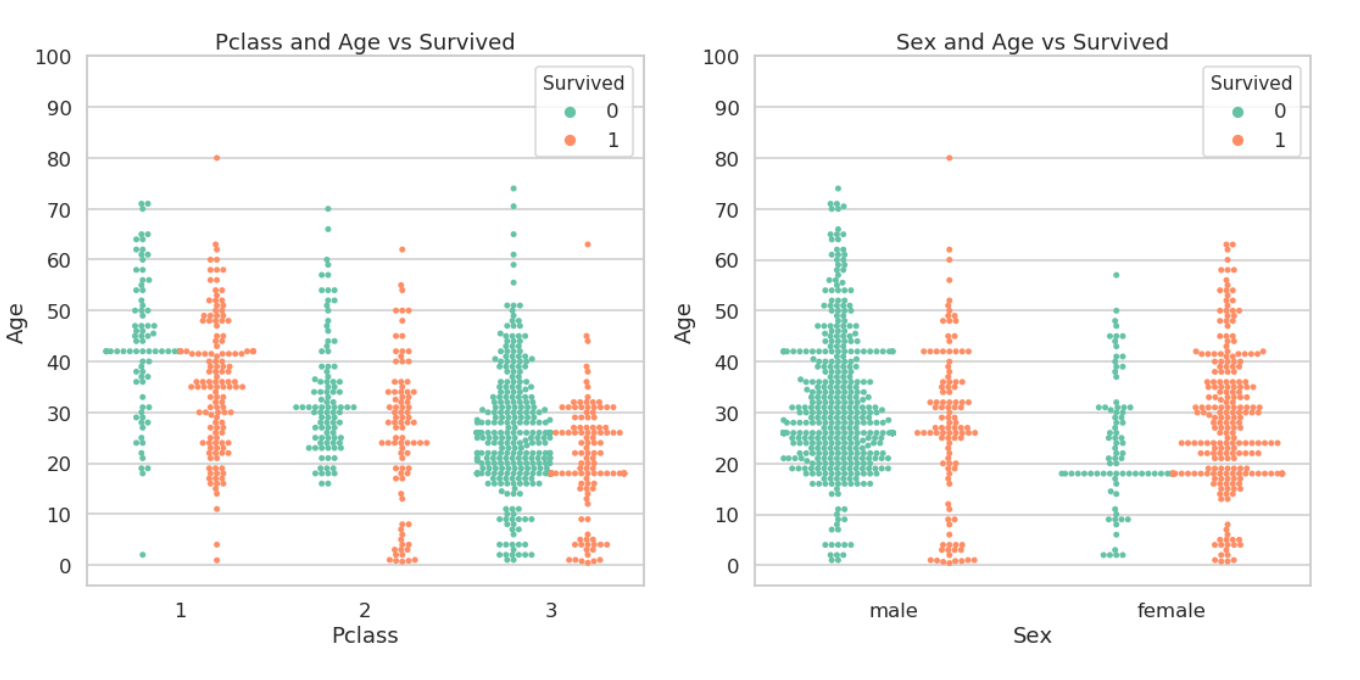![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

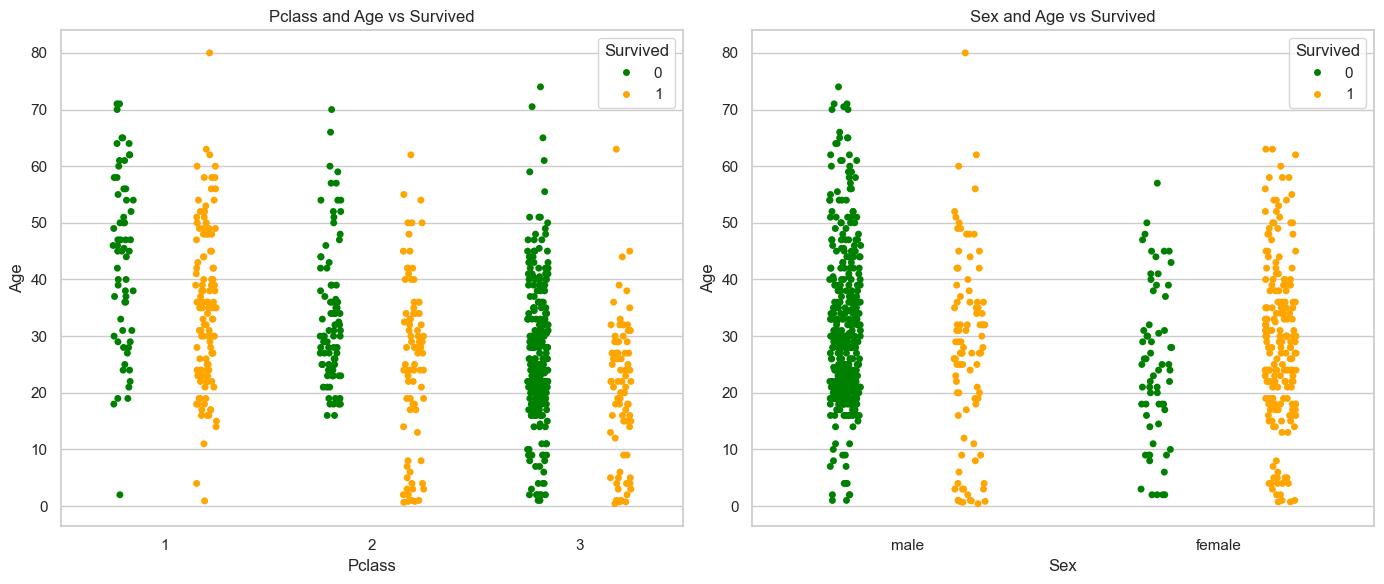

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv").dropna(subset=["Age"])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.stripplot(data=df, x="Pclass", y="Age", hue="Survived", dodge=True, jitter=True, ax=axes[0], palette={0: "green", 1: "orange"})
axes[0].set_title("Pclass and Age vs Survived")

sns.stripplot(data=df, x="Sex", y="Age", hue="Survived", dodge=True, jitter=True, ax=axes[1], palette={0: "green", 1: "orange"})
axes[1].set_title("Sex and Age vs Survived")

plt.tight_layout()
plt.show()

# Відображає розподіл пасажирів за віком та класом квитка з позначкою їхнього виживання.
# Зелені точки – пасажири, які не вижили (Survived = 0).
# Помаранчеві точки – пасажири, які вижили (Survived = 1).
# Виживаність була найвищою серед пасажирів 1-го класу, особливо серед дітей та молодих жінок.

# 2
# Відображає залежність виживання від віку та статі.
# Жінки (female) мали набагато вищий рівень виживання, незалежно від віку.
# Чоловіки (male) в більшості випадків загинули, особливо ті, хто був у віці від 20 до 40 років.
# Маленькі діти (особливо дівчатка) мали значно вищі шанси вижити.

**Задача 8** Побудуйте наступні діаграми розподілів:  

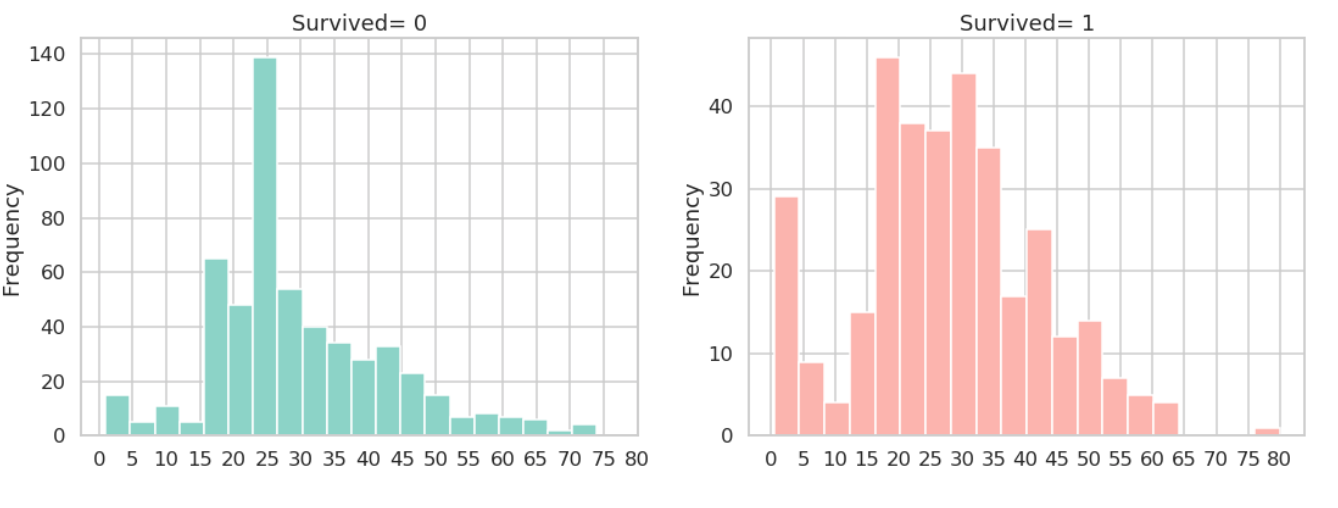



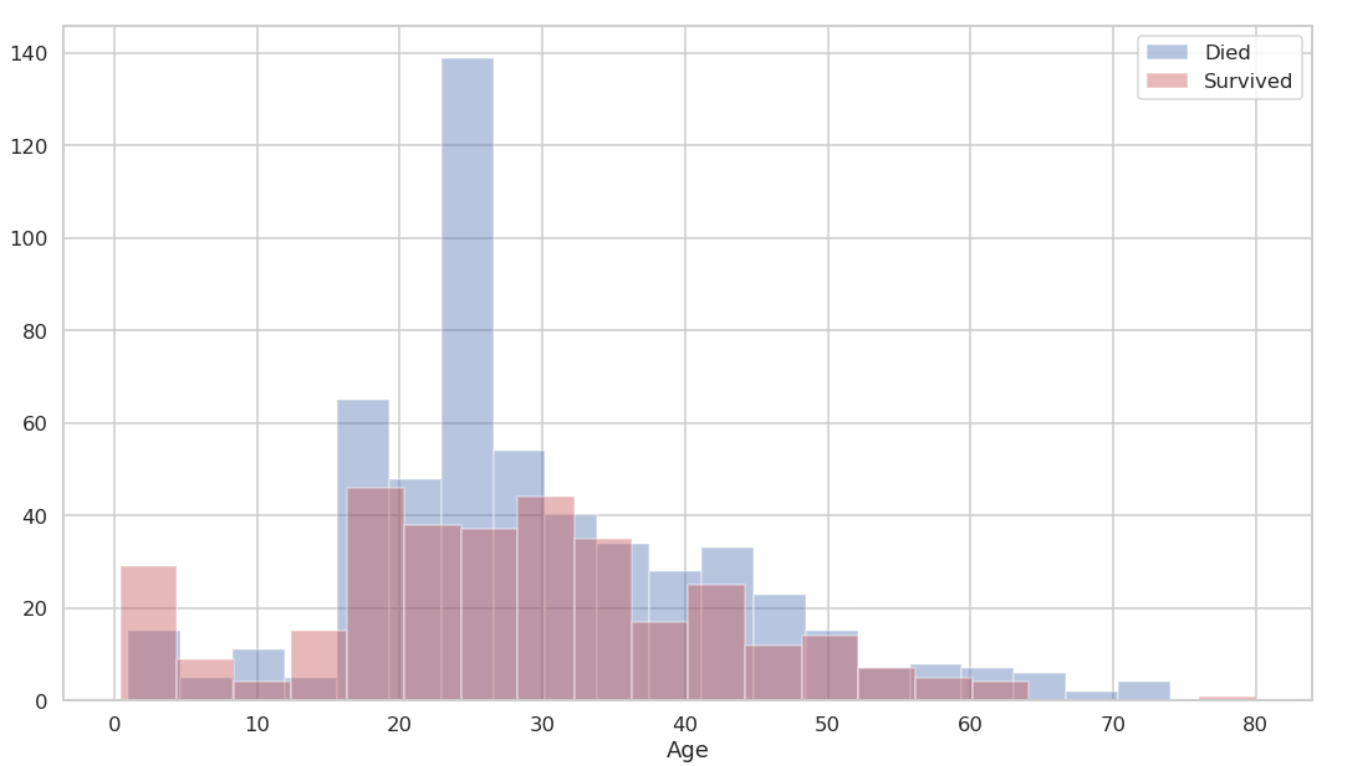

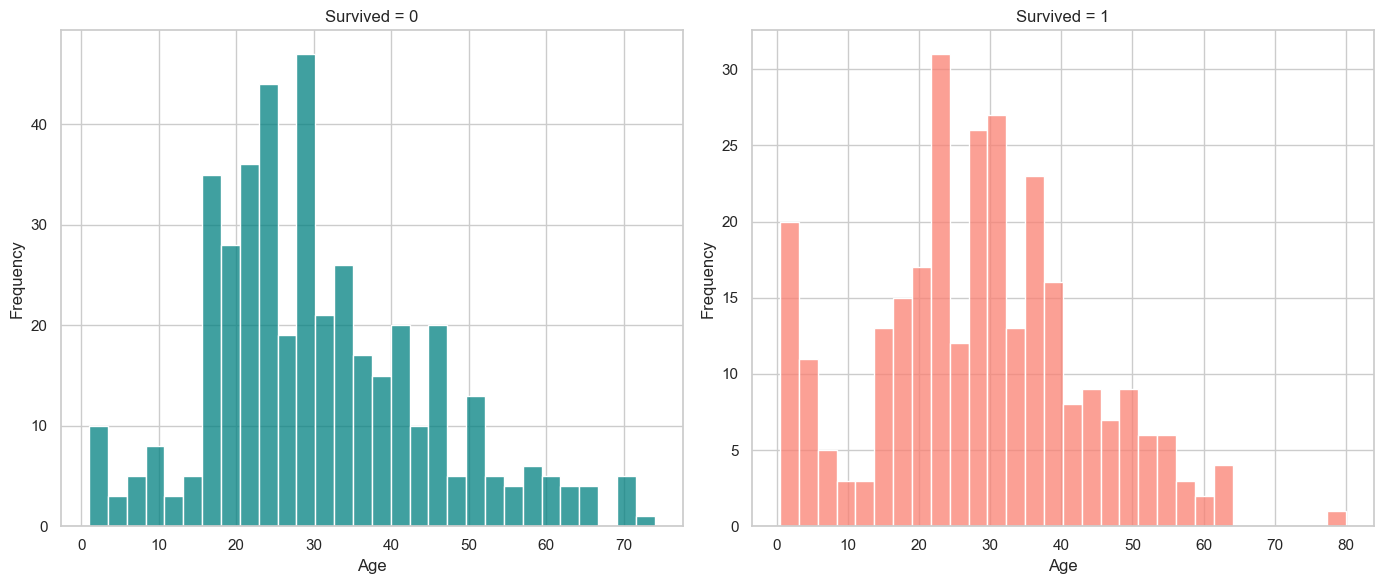

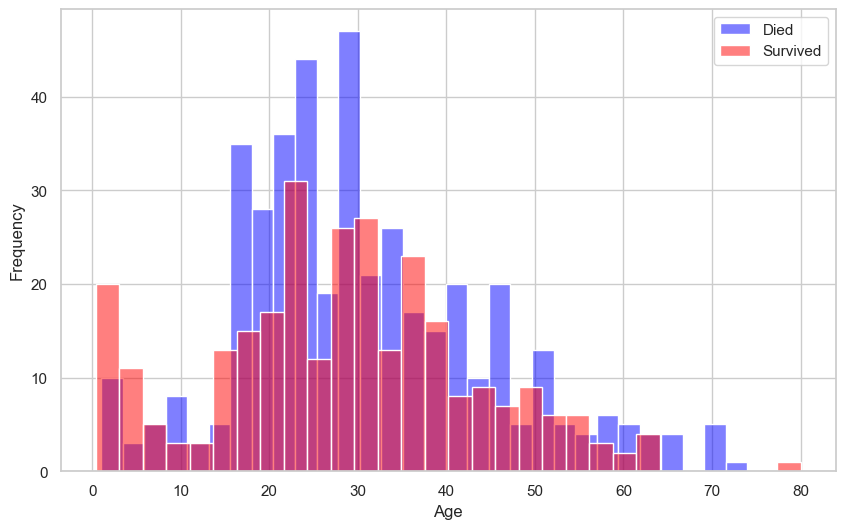

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv").dropna(subset=["Age"])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, surv in enumerate([0, 1]):
    sns.histplot(df[df["Survived"] == surv]["Age"], bins=30, ax=axes[i], color=["teal", "salmon"][i])
    axes[i].set_title(f"Survived = {surv}")
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df[df["Survived"] == 0]["Age"], bins=30, color="blue", alpha=0.5, label="Died")
sns.histplot(df[df["Survived"] == 1]["Age"], bins=30, color="red", alpha=0.5, label="Survived")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("")
plt.show()


# Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?
# Розподіл загиблих (Survived = 0)
# Розподіл виживших (Survived = 1)
# Порівняння виживших і загиблих (накладена гістограма)
# можна ще Обчислити середнє значення та медіану для кожної групи (виживших і загиблих).

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
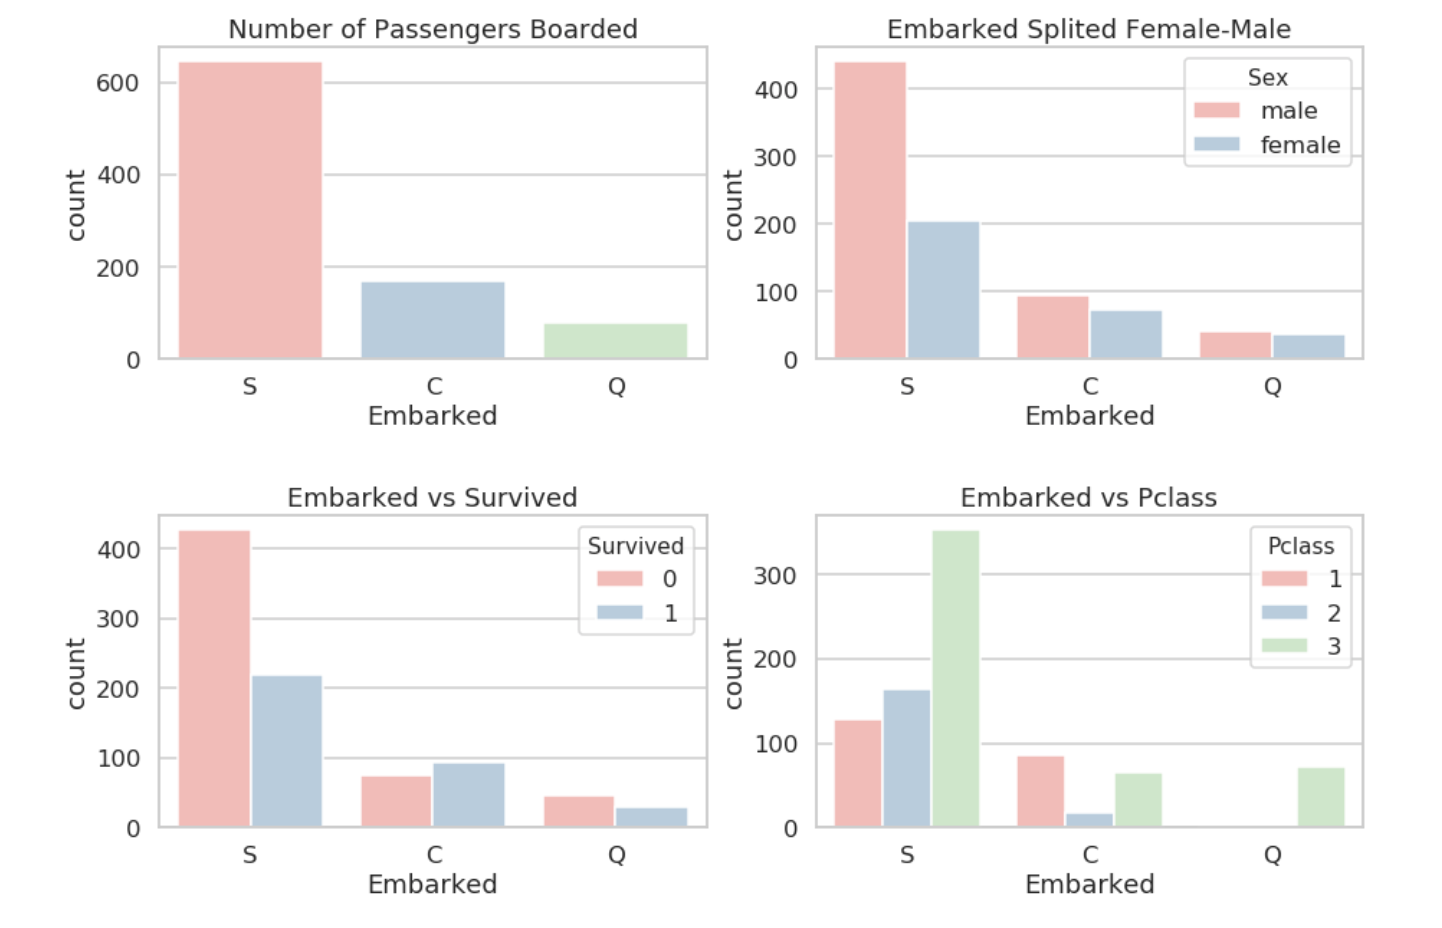

C:\Users\Artur\AppData\Local\Temp\ipykernel_13868\3425486692.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Embarked", ax=axes[0, 0], palette="pastel")


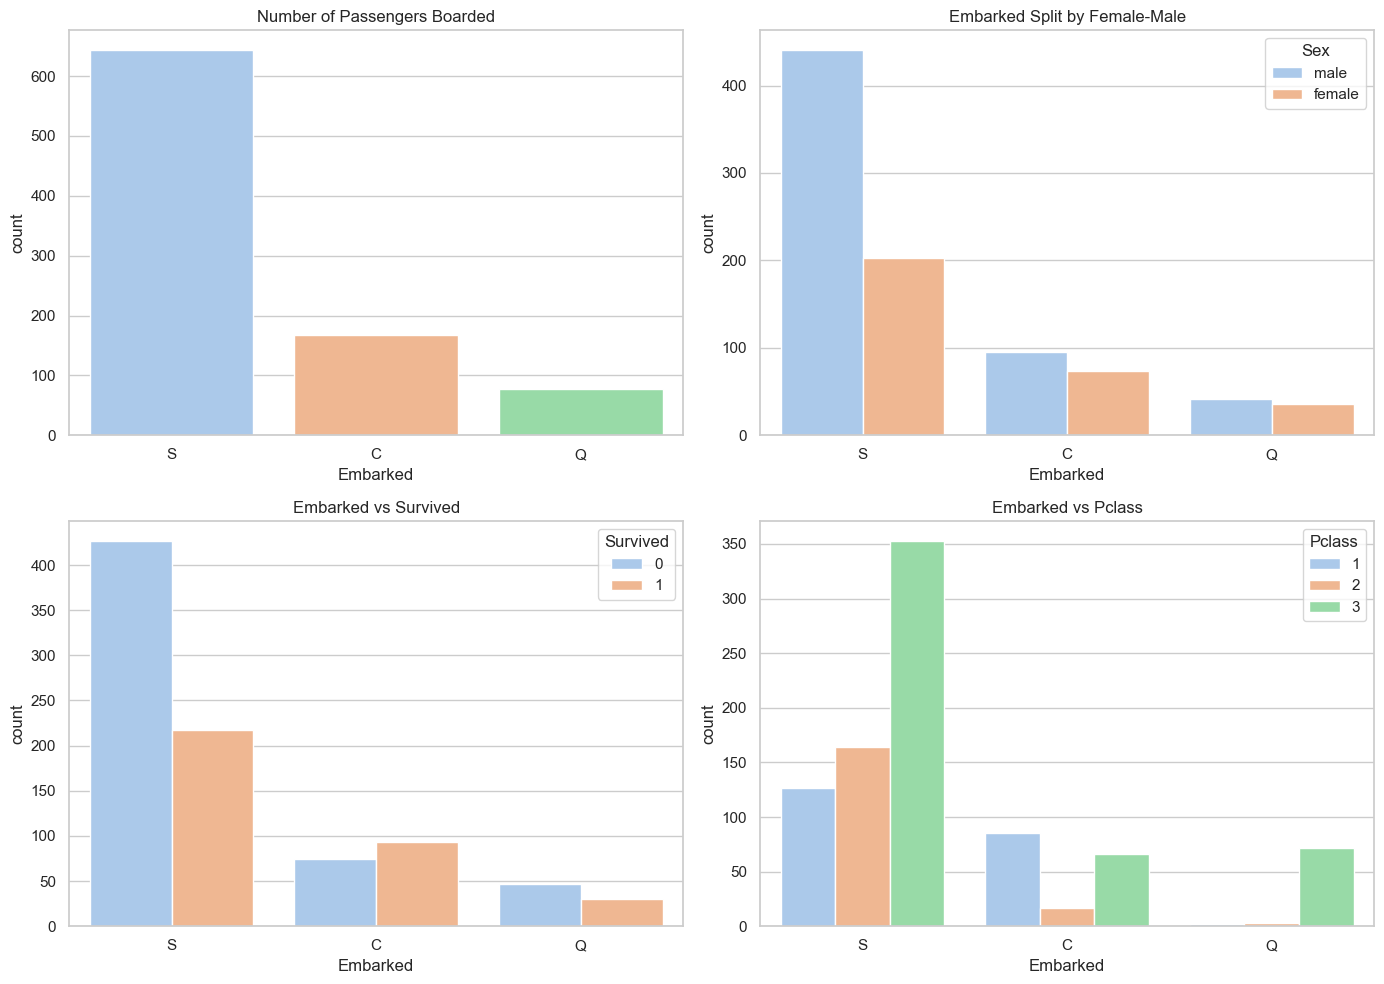

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv").dropna(subset=["Embarked"]) 

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=df, x="Embarked", ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title("Number of Passengers Boarded")

sns.countplot(data=df, x="Embarked", hue="Sex", ax=axes[0, 1], palette="pastel")
axes[0, 1].set_title("Embarked Split by Female-Male")

sns.countplot(data=df, x="Embarked", hue="Survived", ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title("Embarked vs Survived")

sns.countplot(data=df, x="Embarked", hue="Pclass", ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title("Embarked vs Pclass")

plt.tight_layout()
plt.show()

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

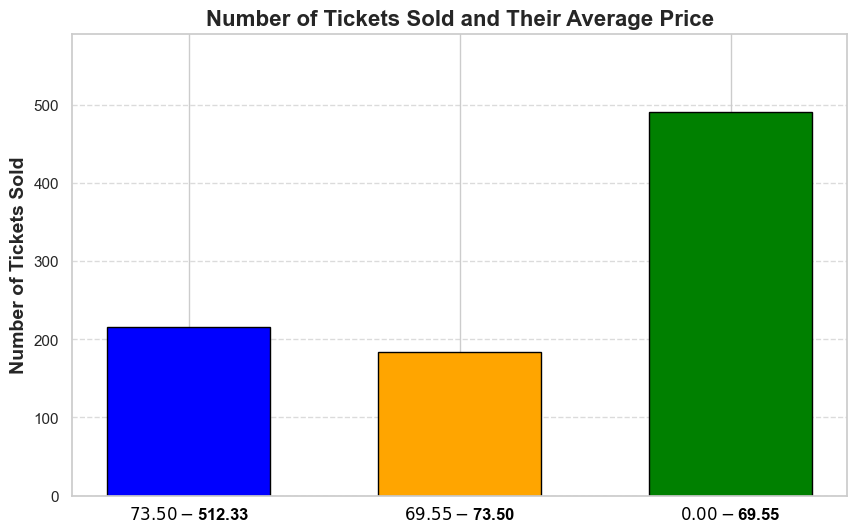

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv").dropna(subset=["Fare", "Pclass"])

ticket_price_ranges = [
    (73.50, 512.33),
    (69.55, 73.50),
    (0.00, 69.55)
]

ticket_counts = df["Pclass"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(ticket_counts.index, ticket_counts.values, color=["blue", "orange", "green"], width=0.6, edgecolor='black')

for i, (min_fare, max_fare) in enumerate(ticket_price_ranges, start=1):
    plt.text(i, -30, f"${min_fare:.2f} - ${max_fare:.2f}", ha='center', fontsize=12, fontweight='bold', color='black')

plt.xlabel("")
plt.ylabel("Number of Tickets Sold", fontsize=14, fontweight='bold')
plt.title("Number of Tickets Sold and Their Average Price", fontsize=16, fontweight='bold')
plt.xticks(ticks=[1, 2, 3], labels=["", "", ""])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(ticket_counts.values) + 100)
plt.show()


Прокоментуйте побудовані графіки

In [ ]:
# 1й клас синій Має найширший розкид вартості квитків – від дешевих до найдорожчих (понад 500).
# 2й клас оранжевий Квитки дорожчі, але не надто перевищують квитки 3-го класу
# 3й клас зелений Найбільша кількість пасажирів мала дуже дешеві квитки (нижче 20).